In [ ]:
#https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset

Great question 🌸 — for **flower image classification**, the best pretrained model depends on:

* **Dataset size** (few thousand vs. hundreds of thousands images).
* **Hardware** (GPU/TPU vs. CPU).
* **Accuracy vs. speed tradeoff**.

Here are some of the most commonly used pretrained models in **computer vision** that work well for flowers (and natural images in general):

---

### 🔥 Best Pretrained Models for Flower Image Prediction

1. **ResNet50 / ResNet101**

   * Very popular baseline.
   * Strong performance, learns deep features well.
   * Good balance of accuracy & efficiency.
   * Great if you have a **medium-sized dataset (10k–50k images)**.

2. **EfficientNet (B0–B7)**

   * Scales very well (B0 is small & fast, B7 is huge & accurate).
   * State-of-the-art accuracy on many benchmarks.
   * Recommended for **flower datasets**, because flowers have subtle differences in texture, shape, and color → EfficientNet captures these details well.

3. **InceptionV3**

   * Works well with **natural images & objects**.
   * Good if your dataset isn’t very large.
   * Lower computational cost compared to ResNet101/EfficientNet-B7.

4. **DenseNet (121, 169, 201)**

   * Captures **fine-grained details** → perfect for flowers where petal structures matter.
   * Memory efficient, but slower to train than ResNet.

5. **Vision Transformers (ViT, Swin Transformer)**

   * Modern approach using **attention instead of CNNs**.
   * Excellent performance on fine-grained classification tasks.
   * Requires **larger dataset or data augmentation** to perform at peak.

---

### ⚡ Recommendation for Flower Images

* If you want **high accuracy** → **EfficientNetB3–B5** or **DenseNet201**.
* If you want **speed & decent accuracy** → **ResNet50** or **EfficientNetB0**.
* If you want to try **cutting-edge models** → **ViT (Vision Transformer)** or **Swin Transformer**.

---




In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kausthubkannan/5-flower-types-classification-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the '5-flower-types-classification-dataset' dataset.
Path to dataset files: /kaggle/input/5-flower-types-classification-dataset


Found 4999 files belonging to 5 classes.
Using 4000 files for training.
Flower classes: ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']


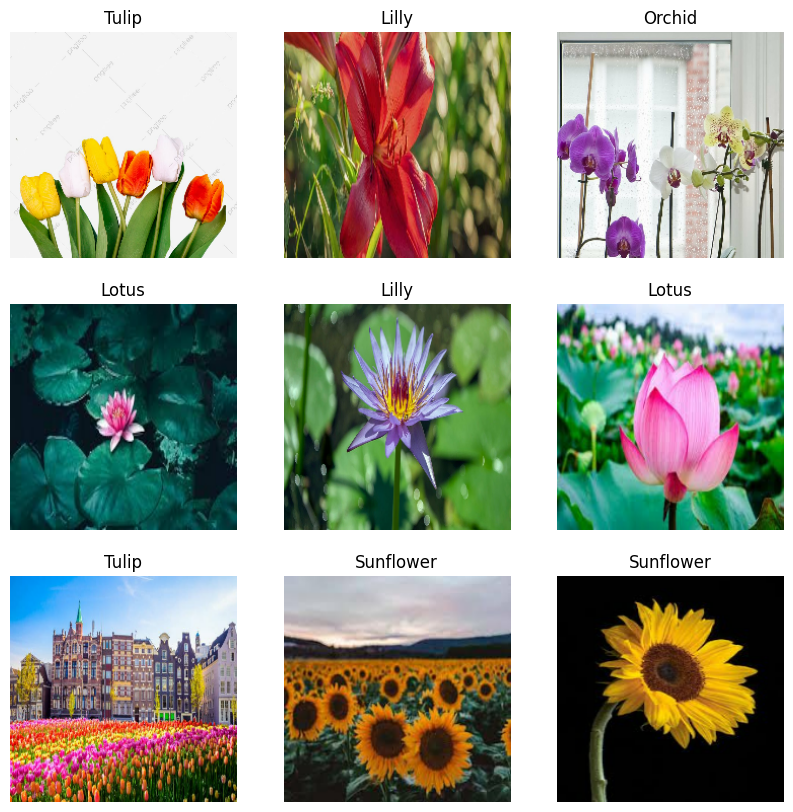

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

DATA_DIR = f"{path}/flower_images"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Use tf.keras utility to load dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Flower classes:", class_names)

# Take one batch
images, labels = next(iter(train_ds))

# Show first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()


Found 4999 files belonging to 5 classes.
Using 4000 files for training.
Found 4999 files belonging to 5 classes.
Using 999 files for validation.
Flower classes: ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']


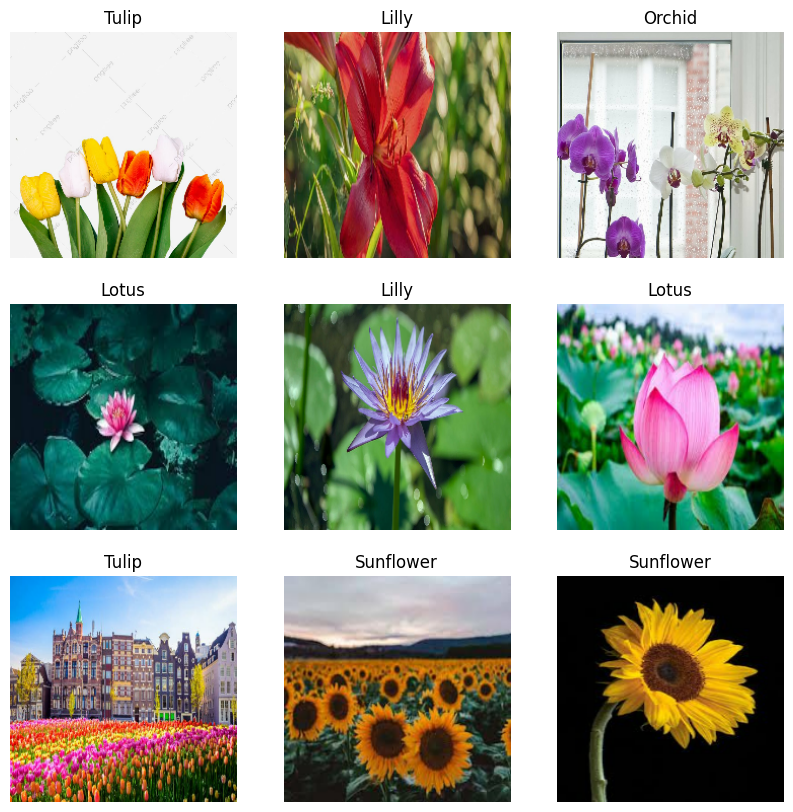

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb3 (Functional)     │ (None, 7, 7, 1536)     │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         7,685 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,791,220 (41.17 MB)

 Trainable params: 7,685 (30.02 KB)

 Non-trainable params: 10,783,535 (41.14 MB)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 47s 220ms/step - accuracy: 0.4641 - loss: 1.2955 - val_accuracy: 0.8098 - val_loss: 0.6218
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 173ms/step - accuracy: 0.7856 - loss: 0.6296 - val_accuracy: 0.8408 - val_loss: 0.4884
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.8084 - loss: 0.5530 - val_accuracy: 0.8478 - val_loss: 0.4451
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.8285 - loss: 0.5013 - val_accuracy: 0.8529 - val_loss: 0.4082
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 174ms/step - accuracy: 0.8379 - loss: 0.4653 - val_accuracy: 0.8619 - val_loss: 0.3930
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 150s 700ms/step - accuracy: 0.6604 - loss: 0.8813 - val_accuracy: 0.8498 - val_loss: 0.4571
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 665ms/step - accuracy: 0.7472 - loss: 0.6775 - val_accuracy: 0.8478 - val_loss: 0.4693
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 666ms/step - accuracy: 0.8049 - loss: 0.578

Validation Loss: 0.3643, Validation Accuracy: 0.8769
Model saved as efficientnet_flowers.h5


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB3
import matplotlib.pyplot as plt

# =============================
# Step 1: Paths & Parameters
# =============================
DATA_DIR = f"{path}/flower_images"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# =============================
# Step 2: Load Dataset
# =============================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Flower classes:", class_names)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# =============================
# Step 3: Visualize Few Samples
# =============================
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# =============================
# Step 4: Data Augmentation Layer
# =============================
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

# =============================
# Step 5: Build Transfer Learning Model (EfficientNetB3)
# =============================
base_model = EfficientNetB3(
    weights="imagenet",
    include_top=False,
    input_shape=(*IMG_SIZE, 3)
)
base_model.trainable = False  # Freeze base initially

inputs = layers.Input(shape=(*IMG_SIZE, 3))
x = data_augmentation(inputs)              # Augmentation
x = tf.keras.applications.efficientnet.preprocess_input(x)  # EfficientNet preprocessing
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = models.Model(inputs, outputs)

model.summary()

# =============================
# Step 6: Compile & Train (Stage 1: Train Top Layers Only)
# =============================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

# =============================
# Step 7: Fine-tune Base Model
# =============================
base_model.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    initial_epoch=history1.epoch[-1] + 1
)

# =============================
# Step 8: Evaluate Model
# =============================
loss, acc = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {acc:.4f}")

# =============================
# Step 9: Save Model
# =============================
model.save("efficientnet_flowers.h5")
print("Model saved as efficientnet_flowers.h5")
